In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta

%matplotlib inline

In [23]:
df = pd.read_csv('data/dataset.csv',sep=';')
df['fecha informe'] = pd.to_datetime(df['fecha informe'],format="%d-%m-%Y")
df.shape

(64, 3)

In [24]:
dfContagiados = df[df["tipo"] == "contagiados"].copy().reset_index(drop=True)
dfFallecidos = df[df["tipo"] == "fallecidos"].copy().reset_index(drop=True)
print(dfContagiados.shape)
print(dfFallecidos.shape)

(42, 3)
(22, 3)


In [25]:
def calcularDiasNuevos(df):
    
    for i, row in df.iterrows():     
        if i == 0: 
            df.loc[i, 'dias transcurrido'] = 0
            df.loc[i, 'nuevos'] = df.loc[i, 'total']           

        else:
            df.loc[i, 'dias transcurrido'] = (df.loc[i, 'fecha informe'] - df.loc[0, 'fecha informe']).days
            df.loc[i, 'nuevos'] = df.loc[i, 'total'] - df.loc[i-1, 'total']
             
    df = df[["fecha informe","tipo","total","dias transcurrido","nuevos"]]        
    return df

dfContagiados = calcularDiasNuevos(dfContagiados)
dfFallecidos = calcularDiasNuevos(dfFallecidos)

In [12]:
dfContagiados[["nuevos"]].describe()

,nuevos
count,42.000000
mean,179.166667
std,160.984762
min,1.000000
25%,11.000000
50%,139.000000
75%,308.500000
max,529.000000


In [13]:
dfFallecidos[["nuevos"]].describe()

,nuevos
count,22.000000
mean,3.727273
std,2.763397
min,1.000000
25%,1.000000
50%,3.500000
75%,5.750000
max,9.000000


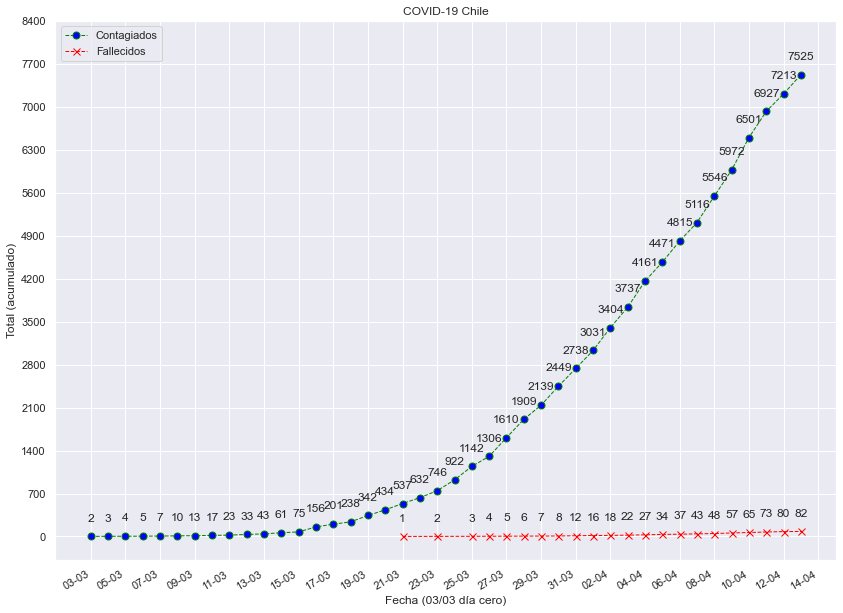

In [14]:
sns.set(color_codes=True)

fig, ax = plt.subplots()

ax.plot(dfContagiados["fecha informe"],dfContagiados["total"],
        color='green', linestyle='dashed', linewidth = 1,
        marker='o', markerfacecolor='blue', markersize=7,
        label="Contagiados")

ax.plot(dfFallecidos["fecha informe"],dfFallecidos["total"],
        color='red', linestyle='dashed', linewidth = 1,
        marker='x', markerfacecolor='blue', markersize=7,
        label="Fallecidos")

xticks = np.arange(
        df["fecha informe"].min(), 
        df["fecha informe"].max() + timedelta(days=2), 
        timedelta(days=2),
        dtype='datetime64[D]')

ax.set_xticks(xticks)

yticks = np.arange(0, df["total"].max() + 1000, 700)
ax.set_yticks(yticks)

myFmt = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(myFmt)

plt.gcf().set_size_inches(14,11)
plt.title('COVID-19 Chile') 
plt.xlabel('Fecha (03/03 día cero)') 
plt.ylabel('Total (acumulado)') 
ax.legend(loc="upper left")
fig.autofmt_xdate()

def setLabelPlot(df):
    
    for x,y in zip(df["fecha informe"],df["total"]):

        label = "{:.0f}".format(y)
        ax.annotate(label, 
                    (x,y), 
                    textcoords="offset points", 
                    xytext=(0,15), 
                    ha='center') 

setLabelPlot(dfContagiados)
setLabelPlot(dfFallecidos)        
    
plt.show()